In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import tanh
from IPython.display import clear_output
from sklearn import preprocessing
from sklearn.utils import shuffle

In [2]:
from MLP import *

In [3]:
f_target = lambda x: x**3-x**2
tx = np.sort( (2*np.random.rand(300)-1)*2 )
ty = np.array( [f_target(x)+(2*np.random.rand()-1) for x in tx ])#.reshape(1,-1)
#ty = preprocessing.normalize(ty,axis=1).reshape(-1)
tx = (tx-np.min(tx))/(np.max(tx)-np.min(tx))
tx = tx.reshape(-1,1)
ty = ty.reshape(-1,1)
#ty = (ty-np.min(ty))/(np.max(ty)-np.min(ty))

data = np.hstack((tx,ty))
data.shape

(300, 2)

12.005771886121371


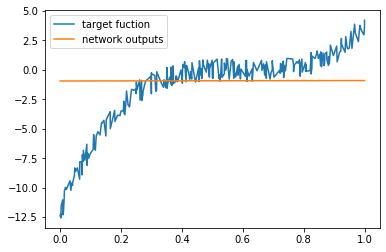

In [16]:
n = MLP(  Nh=[2,10,2], Nu=1, Ny=1, f='tanh', f_out='ide', w_scale=5 )
plt.plot(tx,ty,label='target fuction')
outs = n.supply_sequence(tx).reshape(-1)

plt.plot(tx,outs,label='network outputs')
plt.legend()
print( MSE(outs,ty))

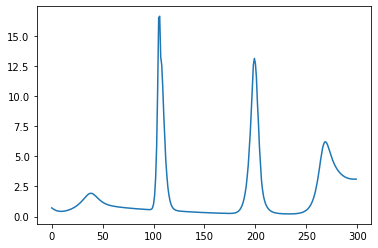

In [17]:
g,e = n.momentum_train(tx, ty, 5e-02,1e-03)
plt.plot(g)

1.0200724472388607


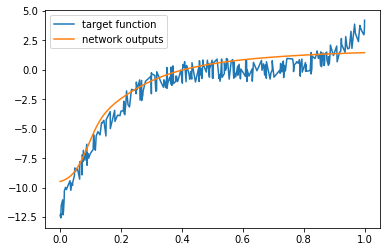

In [18]:
plt.plot(tx,ty,label='target function')
outs = n.supply_sequence(tx)
outs = outs.reshape(ty.shape)
plt.plot(tx,outs.reshape(-1),label='network outputs')
plt.legend()

print( MSE(outs,ty))